<a href="https://colab.research.google.com/github/Tahimi/convectionDiffusion/blob/main/animatedOutputIn1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical solution of Convection-Diffusion Equation in 1D with Dirichlet BCs

In [1]:
# mounting the drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# time discretization

t0 = 0.0
delT = 0.2
dt = 0.001
stepsNbr = int(delT/dt)
print('time steps number = ', stepsNbr)

time steps number =  200


In [3]:
# space discretization
import numpy as np

xL = 0.0
xR = 1.0
delX = xR - xL
nx = 500
dx = delX/nx
x = np.arange(xL, xR, dx)

In [4]:
# definig unkown's distribution

def f(x):
    return np.sin(np.pi*(x-xL)/xR)

In [5]:
# setting diffusion and covection parameters

# diffusion
alpha = 1

# advection
beta = 5

In [6]:
# computing eigenvalues

n = 70
a = np.empty(n)
N = np.arange(1,n+1,1)
for i in N:
    a[i-1]=(-(i*np.pi/xR)**2)

In [7]:
# defining the analytical solution
import scipy.integrate

def u(x,t,beta):
    sum = 0
    for i in N:
        sum= sum+2/xR*scipy.integrate.quad(lambda x:np.exp(-beta/(2*alpha**2)*x)*f(x)* \
                                             np.sin(i*np.pi*x/xR),0,xR)[0]*np.sin(i*np.pi*x/xR)* \
                                             np.exp(-alpha**2*(i*np.pi/xR)**2*t)
    return sum*np.exp(-beta**2/(4*alpha**2)*t)*np.exp(beta/(2*alpha**2)*x)

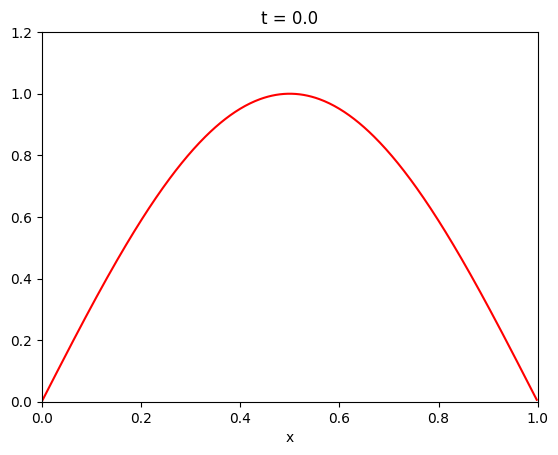

In [8]:
# producing the animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlabel('x')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.2)
ax.set_xlim(xL,xR)

def solution(t):
    p = u(x,t,beta)
    return p

def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text('t = ' + str(round(t,3)))
    return [plotLine,plotTitle]

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(t0, delT, 50*dt), repeat=True, blit=False) #frames=np.arange(t0, delT, dt)

In [9]:
# saving the animation
from matplotlib.animation import PillowWriter

gifAnimation1DEvery50dt = '/content/drive/MyDrive/UFAL/advection_diffusion/FiniteDiference_FipyFiniteVolume/gifAnimation1DEvery50dt.gif'
ani.save(gifAnimation1DEvery50dt, writer=PillowWriter(fps=1)) #fps=24 images per second

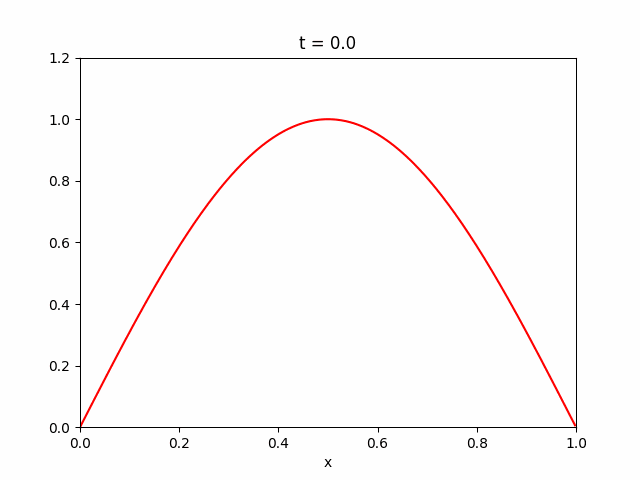

In [10]:
# displaying the animation
from IPython.display import Image

Image(open(gifAnimation1DEvery50dt,'rb').read())